# Classificacao

Base: [**Titanic**: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)

Questão: Elaboracao de  uma  solucao utilizando dois algoritmos de aprendizagem de maquina para classificar se o passageiro tem ou nao  chance de sobreviver.

## Pré-processamento

- [x] Identificar instancias com atributos incompletos
- [x] Gerar matriz de correlacao
- [x] Identificar a presenca de outliers e verificar se as classes estao balanceadas
- [x] Ilustrar graficamente balanceamento (e.g. histograma)

**Dicas**

- A partir da analise da base de dados, para bons resultados possivelmente  sera necessario pre-processar os dados. Para identificar osoutliers, recomenda-se ilustra-los graficamente(e.g. boxplot). 
- Divida (aleatoriamente) o conjunto em treinamento e teste: 80% e 20%, respectivamente. 
- Para  analisar  os  resultados  de  cada  metrica,  identifique  os  falsos  positivos,  falsos negativos, verdadeiros positivos e verdadeiros negativos. 

**Bonus**

Altere dois parametros de cada algoritmo de aprendizagem de maquina utilizadosna questao e discuta os resultados obtidos. Exemplo: alterar a quantidade de k vizinhos e afuncao de distancia utilizada, alterar a funcao kernel do SVM, alterar a arquitetura da redeneural (e.x. camadas e funcao de ativacao, alterar o otimizador e a taxa de aprendizado).

## Treinamento

- [ ] Justifique a escolha dos dois algoritmos de aprendizagem de maquina utilizados e discuta os  resultados  obtidos  em  ambos. Explique  porque  voce  acredita  que  os  algoritmos escolhidos sao mais apropriados para o problema
 - [ ] Definir e explicar metodos a serem utilizados
 - [ ] Aplicar metodos e visualizar resultado
- [ ] Analise  os  resultados  considerando  matriz  de  confusao,  especificidade,  sensibilidade,medida  f1  e  acuracia.  Descreva  detalhadamente  os  resultados  obtidos  por  cada  metrica,justificando a diferenca entre eles

In [1]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Carregando os dados 

Como dito na descrição da questão é necessário distribuir os dados do dataset de treino em 80% para treino e 20% para testes, pois os dados de testes não contam com o atributo de Sobrevivencia. Este passo será realizado após o tratamento dos dados.

In [2]:
train_df = pd.read_csv("train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Identificando instancias com atributos incompletos

### Identificando os tipos dos atributos

O primeiro passo é identificar como estão distribuidos os dados e seus tipos.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Informações Relevantes

- Podemos observar que a coluna **Cabin** tem uma grande quantidade de valores vazios. O mesmo podemos dizer de **Age** e **Embarked**, porem em proporções diferentes. 
- 7 atributos já são numéricos e 5 são objetos (Strings)

### Descrição estatistica dos atributos

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Informações Relevantes

- Como observado na tabela acima podemos ver que existe um **outlier** de valor maximo muito acima da média do preço de cada bilhete(Fare)


### Boxplot para verificar a distribuição dos dados

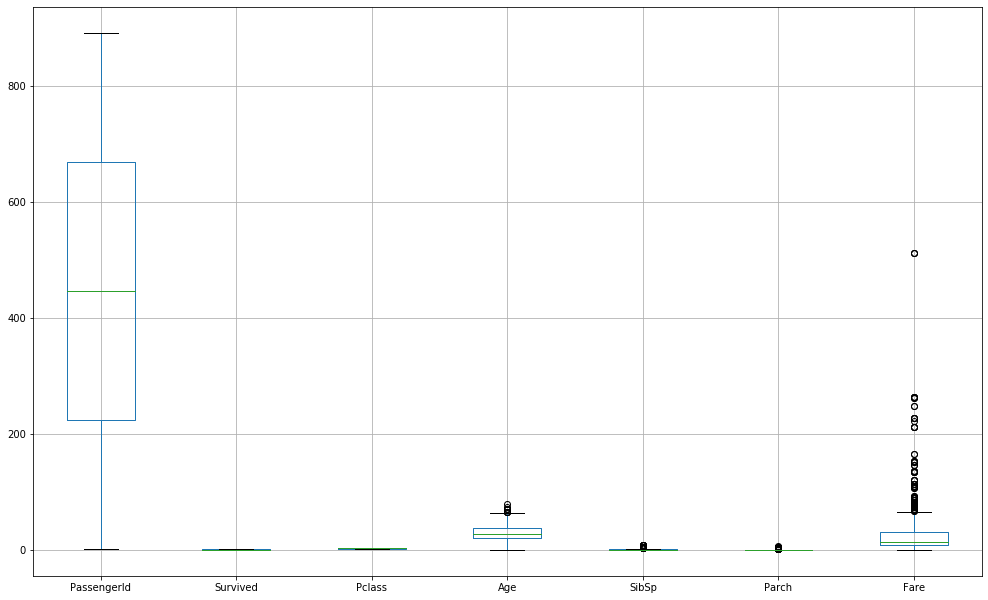

In [6]:
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
train_df.boxplot()

### Buscando os outliers de Fare para serem substituidos pela mediana

In [7]:
a = train_df.loc[train_df["Fare"] > 300]
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


#### Informações Importantes

- Foram encontrados 3 outlieers e todos sobreviveram, logo podemos observar que quem pagou mais sobreviveu.. O dinheiro que manda!!

In [8]:
aux = np.array(train_df["Fare"])
train_df["Fare"] = train_df["Fare"].replace(512.3292, np.nanmedian(aux))

### Boxplot para verificar a distribuição dos dados

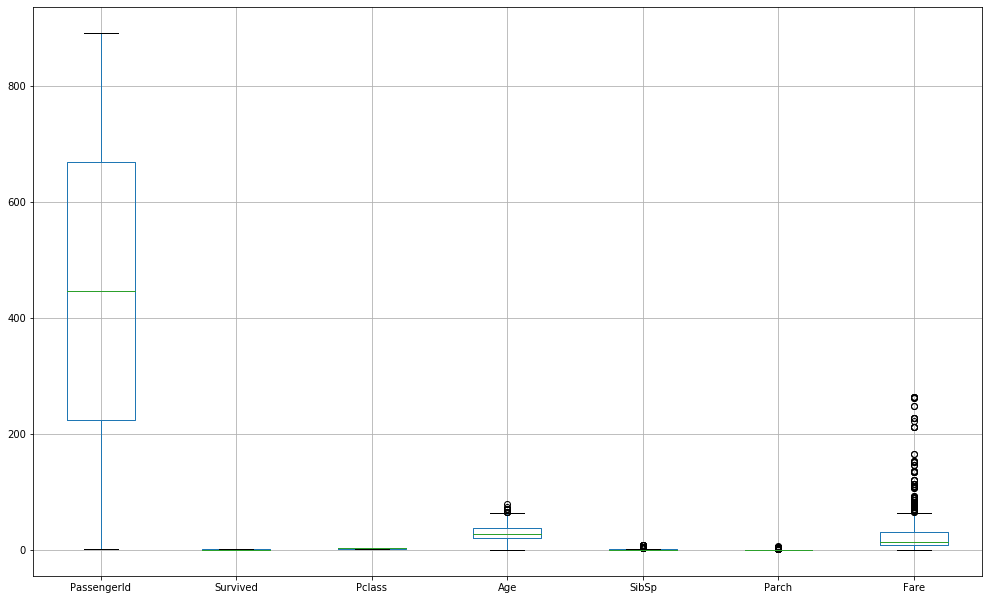

In [9]:
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
train_df.boxplot()

### Como visto anteriormente **Cabin** contem muitos dados vazios

É possivel analisar que Cabin é uma string muito específica para o navio, que indica somente a posição de quarto. Para esta analise, foi considerado que essa posição geografica pode não ser relevante devido a grande extensão do navio e também a quantidade de atrações internas, ou seja, o ocupante pode não estar na cabine no momento do naufrágio.

In [10]:
train_df = train_df.drop(["Cabin"],1)

###  Outra instancia que possui valores vazios é Embarked

Este por sua vez apresenta o local onde o tripulante embarcou, pode ser relevante para a classificação então será mantido e os valores vazios representam um percentual muito pequeno do todo, por isso serão excluidos.

In [11]:
train_df.dropna(subset=["Embarked"], inplace = True)

### Removendo o nome do passageiro

Esta coluna é muito específica e não é tao relevante para o modelo, assim devemos removela.

In [12]:
train_df = train_df.drop(["Name"],1)

### O número do bilhete

O número do bilhete não diz muito sobre os passageiros, mesmo sendo uma informação sem valores vazios

In [13]:
train_df = train_df.drop(["Ticket"],1)

## Analisando os dados e tentando encontrar padrões entre sobreviventes

Nessa analise para não interferir na média, foram retirados os valores vazios.

### A probabilidade de Sobrevivencia de acordo com a classe da viagem.

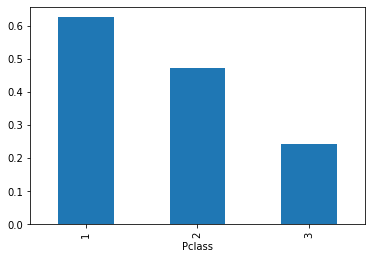

In [14]:
tmp = train_df.groupby('Survived').Pclass
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()

#### Informações importantes

- Podemos ver que a maioria dos sobreviventes foram da **primeira classe**, este fator pode ter importante relação para a classificação

### A probabilidade de Sobrevivencia de acordo com o local de Embarque

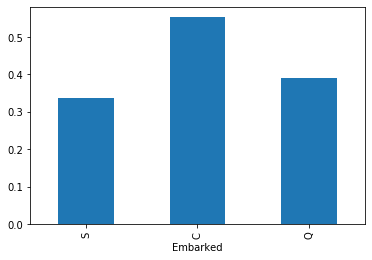

In [15]:
tmp = train_df.groupby('Survived').Embarked
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()

#### Informações Importantes

- A maioria dos sobreviventes embarcaram em **Cherbourg**, que foi o segundo ponto de parada na rota

### A probabilidade de Sobrevivencia de acordo com o Sexo

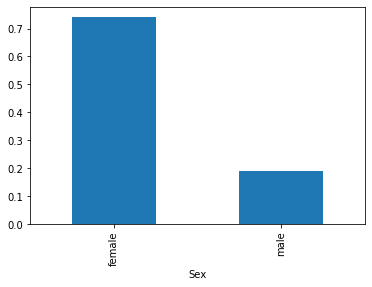

In [16]:
tmp = train_df.groupby('Survived').Sex
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()

#### Informações Importantes

- A maioria dos sobreviventes foram **Mulheres**, mas estes dados ainda precisam ser tratados para o modelo.

### A probabilidade de Sobrevivencia de acordo com a Idade

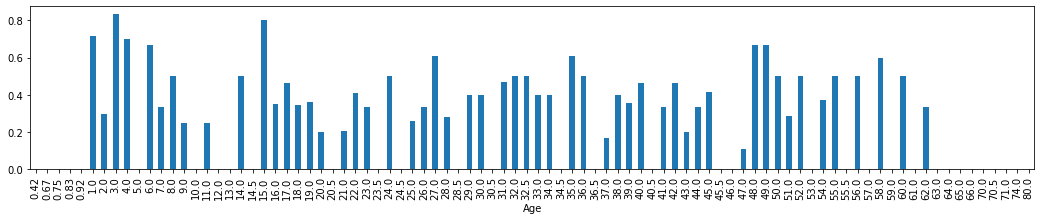

In [17]:
tmp = train_df.groupby('Survived').Age
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar(figsize=[18,3])

#### Informações Importantes

- Aqui existe uma distribuição de idades que não traz muitas informações sobre sua importância, portanto devemos investigar melhor suas relações com outros atributos

### Existe alguma relação entre a idade e a classe ??

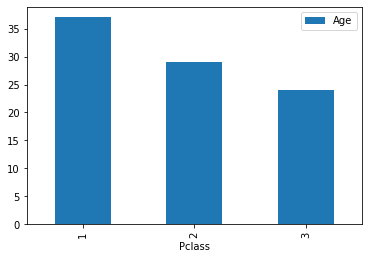

In [18]:
tmp = train_df[["Pclass", "Age"]].groupby("Pclass").median()
tmp.plot.bar()

#### Informações Importantes

- Podemos ver que a mediana das idades é bem proxima, e que na primeira classe existiam pessoas mais velhas

#### Como visto anteriormente existem valores de idade vazios no dataset, e esses precisam ser tratados para o modelo

Para fazer o tratamento podemos substituir as instancias vazias pela mediana das idades de cada classe, dessa forma estamos inserindo um ruido menor, do que substituir todos pela mediana total, como foi feito em Fare.

In [19]:
# Média
tmp_median = train_df["Age"].mean().sum()
print("Média:",tmp_median)
# Mediana
tmp_mean = train_df["Age"].median().sum()
print("Mediana:",tmp_mean)
# Moda
tmp_mode = train_df["Age"].mode().sum()
print("Moda:",tmp_mode)

Média: 29.64209269662921
Mediana: 28.0
Moda: 24.0


In [20]:
#Função que itera sobre as linhas e substitui pela mediana das idades
def fillingGaps(df):
    for index, row in df.iterrows():
        if (np.isnan(row.Age)):
            df.loc[index, 'Age'] = df[(df.Pclass == row.Pclass)].Age.median()

    
    return df

train_df = fillingGaps(train_df)

#### Verificando a relevância desse ruído inserido no dataset

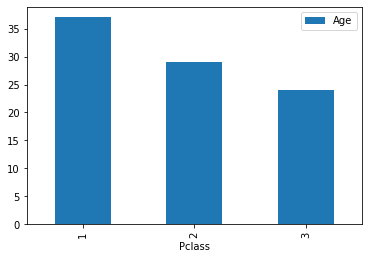

In [21]:
tmp = train_df[["Pclass", "Age"]].groupby("Pclass").median()
tmp.plot.bar()

In [22]:
# Média
tmp_median = train_df["Age"].mean().sum()
print("Média:",tmp_median)
# Mediana
tmp_mean = train_df["Age"].median().sum()
print("Mediana:",tmp_mean)
# Moda
tmp_mode = train_df["Age"].mode().sum()
print("Moda:",tmp_mode)

Média: 29.019313835770525
Mediana: 26.0
Moda: 24.0


#### Informações Importantes

- Podemos ver que a o ruido que foi inserido prejudicou a mediana das idades, mas manteve bem proxima a média e moda.

### Transformando Dados

- Precisa ser tratado o **Sex** que está como male e female
- Precisa ser tratado o **Embarked** que está com a inicial do local de embarque(S,C,Q)

In [23]:
#Tratando Sex
class_sex = {'male':1, 'female': 0}

In [24]:
for key in class_sex:
    train_df['Sex'] = train_df['Sex'].replace(key, class_sex[key])

In [25]:
#Tratando Embarked pela ordem de parada do navio, considerando S como inicial.
class_embarked = {'S':0, 'C':1, 'Q':2}

In [26]:
for key in class_embarked:
    train_df['Embarked'] = train_df['Embarked'].replace(key, class_embarked[key])

### Analise de correlação entre os atributos

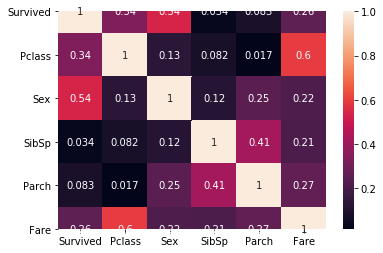

In [27]:
feat = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Fare']

corr = train_df[feat].corr().abs()
corr
sns.heatmap(corr, annot=True)

In [28]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
888,889,0,3,0,24.0,1,2,23.4500,0
889,890,1,1,1,26.0,0,0,30.0000,1


### Split dos dados

In [29]:
train_df, test_df = model_selection.train_test_split(train_df, random_state=42, test_size=0.2)
train_df = train_df.copy()
test_df = test_df.copy()
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,709,1,1,0,22.0,0,0,151.5500,0
240,241,0,3,0,24.0,1,0,14.4542,1
382,383,0,3,1,32.0,0,0,7.9250,0
792,793,0,3,0,24.0,8,2,69.5500,0
683,684,0,3,1,14.0,5,2,46.9000,0


In [30]:
X_train = train_df.drop("Survived", 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

## KNN 

Foi escolhida a técnica KNN após a análise das classes existentes em cada atributo, em sua maioria,
existem 3 e isso otimiza o calculo da distância entre os vetores.

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100,2)#Acuracia

### Matriz de confusão

In [32]:
matriz_confusao = sk.metrics.confusion_matrix(test_df["Survived"], Y_pred)
print(matriz_confusao)

[[30 79]
 [22 47]]


## Resultados

In [33]:
[[tn, fp],[fn, tp]] = matriz_confusao
print("Falso Positivo:", tp)
print("Falso Negativo:", fn)
print("Sensibilidade:", (tp/(tp+fp)*100))
print("Medida f1", sk.metrics.f1_score(test_df["Survived"], Y_pred))
print("Acuracia", acc_knn)

Falso Positivo: 47
Falso Negativo: 22
Sensibilidade: 37.301587301587304
Medida f1 0.48205128205128206
Acuracia 80.17


## SVM

In [34]:
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
Y_svc_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

In [35]:
matriz_confusao = sk.metrics.confusion_matrix(test_df["Survived"], Y_svc_pred)
print(matriz_confusao)

[[109   0]
 [ 65   4]]


## Resultados

In [36]:
[[tn, fp],[fn, tp]] = matriz_confusao
print("Falso Positivo:", tp)
print("Falso Negativo:", fn)
print("Sensibilidade:", (tp/(tp+fp)*100))
print("Medida f1", sk.metrics.f1_score(test_df["Survived"], Y_svc_pred))
print("Acuracia", acc_svc)

Falso Positivo: 4
Falso Negativo: 65
Sensibilidade: 100.0
Medida f1 0.1095890410958904
Acuracia 99.58


## Baye

A tecnica de Classificação Gaussiana Naive Bayse possui em sua essência a probabilidade de um evento ocorrer,
com base nos resultados de um outro evento considerando a associação entre as classes. 

In [39]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_baye_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [40]:
matriz_confusao = sk.metrics.confusion_matrix(test_df["Survived"], Y_baye_pred)
print(matriz_confusao)

[[89 20]
 [18 51]]


## Resultados

In [41]:
[[tn, fp],[fn, tp]] = matriz_confusao
print("Falso Positivo:", tp)
print("Falso Negativo:", fn)
print("Sensibilidade:", (tp/(tp+fp)*100))
print("Medida f1", sk.metrics.f1_score(test_df["Survived"], Y_baye_pred))
print("Acuracia", acc_gaussian)

Falso Positivo: 51
Falso Negativo: 18
Sensibilidade: 71.83098591549296
Medida f1 0.7285714285714284
Acuracia 78.62
